In [5]:
# In this notebook, we estimate the time constants T_d and T_p using linear regression by taking time estimations E[T] of many points with different N and K values for 3 dimensional case
# Here the grid is assumed to be a square partition

'''
Conclusion:
This one did not work as I used python which did not give proper time reads.
The final one used c++ data which gave proper time steps and data.
'''

In [3]:
import numpy as np
import random
import time
import math

In [4]:
def CollisionCalc(P0, P1, R):
    return ((P0[0]-P1[0])**2 +  (P0[1]-P1[1])**2 +  (P0[2]-P1[2])**2 ) < (4 * R * R)

def TotalCollisions(Points, R):
    calc=  0
    for i in range(len(Points)):
        j = i+1
        while j < len(Points):
            calc+=CollisionCalc(Points[i], Points[j], R)
            j+=1

    return calc

In [5]:
def generateSample(N, K, Samples=1000):
    Dataset = []
    DatasetK = np.random.random((Samples, K, 3))
    for S in range(Samples):
        Partitions = [[[[] for x in range(N)] for x in range(N)] for x in range(N)]

        for i in range(K):
            x = int((DatasetK[S][i][0]*N)-(1e-5))
            y = int((DatasetK[S][i][1]*N)-(1e-5))
            z = int((DatasetK[S][i][2]*N)-(1e-5))
            Partitions[x][y][z].append(DatasetK[S][i])
        Dataset.append(Partitions)
    return Dataset

In [6]:
def SampleTest(Dataset, R=0.004):
    Cols = []
    N, M, O = (len(Dataset[0]), len(Dataset[0][0]), len(Dataset[0][0][0]))
    tTot = 0
    for dat in Dataset:
        Cols.append(0)
        tstart = time.time()
        for i in range(N-1):
            for j in range(M-1):
                for k in range(O-1):
                    Cols[-1]+=TotalCollisions(dat[i][j][k]+dat[i+1][j][k]+dat[i][j+1][k]+dat[i+1][j+1][k]
                                              +dat[i][j][k+1]+dat[i+1][j][k+1]+dat[i][j+1][k+1]+dat[i+1][j+1][k+1], R)
        tTot += (time.time() - tTot)
    return tTot

In [7]:
def EstimateTimeSample(N, K, R=0.004, Samples=1000):
    DataSet = generateSample(N, K, Samples=Samples)
    return SampleTest(DataSet, R = R)/Samples

In [8]:
def DataSet(Nlow, Nhigh, Nstep, Klow, Khigh, Kstep, Samples = 20, SamplesPer = 100):
    timeSteps = []
    for i in range(Samples):
        N = random.randint(int(Nlow/Nstep), int(Nhigh/Nstep))*Nstep
        K = random.randint(int(Klow/Kstep), int(Khigh/Kstep))*Kstep
        timeSteps.append([N, K, EstimateTimeSample(N, K, R=0.15, Samples=SamplesPer)])
    return timeSteps

In [23]:
def DataSetPrep(Dataset):
    #change the (N, K, E[T]) fields in dataset to (N, 32K(K-1)(N-1)^3/N^6, E[T])
    Dat = []
    for x in range(len(Dataset)):
        n = Dataset[x][0]
        k = Dataset[x][1]
        t = Dataset[x][2]
        # Dat.append([n, 32*k*(k-1)*(((n-1)/(n*n))**3), t])
        Dat.append([n, 32*k*(k-1)*(((n-1)/(n*n))**3), t, k])
    return Dat

In [10]:
X = np.array(DataSet(7, 15, 1, 20, 300, 10, Samples=200, SamplesPer = 100))

In [24]:
Y = DataSetPrep(X)

In [25]:
def SampleDatasetToLinearRegForm(Dataset):
    X = []
    Y = []
    for d in Dataset:
        X.append([d[0], d[1], 1])
        Y.append(d[2])
    return (np.array(X), np.array(Y))

In [26]:
Z = SampleDatasetToLinearRegForm(Y)

In [27]:
def linearRegression(X, Y):
    Vars = np.matmul(np.linalg.inv(np.matmul(X.transpose(), X)), np.matmul(X.transpose(), Y))
    return Vars

In [28]:
T_p, T_d, C = linearRegression(Z[0], Z[1])

In [29]:
print(T_p, T_d, C)
print(T_d/T_p)

-0.010435827076435089 4.097935743629932e-06 17031822.2612077
-0.00039267953690832905


In [17]:
ratio = T_d/T_p
Value = np.power(32 * X[:,1] * (X[:,1]-1) * ratio, (1/6))

C:\Users\prath\AppData\Local\Temp\ipykernel_12272\537300113.py:2: RuntimeWarning: invalid value encountered in power
  Value = np.power(32 * X[:,1] * (X[:,1]-1) * ratio, (1/6))


In [18]:
for i in range(len(Value)):
    print(Value[i], X[:,0][i], X[:, 1][i])

nan 9.0 30.0
nan 8.0 130.0
nan 11.0 130.0
nan 10.0 190.0
nan 7.0 170.0
nan 13.0 120.0
nan 13.0 60.0
nan 9.0 250.0
nan 15.0 250.0
nan 8.0 100.0
nan 12.0 100.0
nan 13.0 60.0
nan 15.0 260.0
nan 7.0 250.0
nan 12.0 50.0
nan 9.0 250.0
nan 14.0 20.0
nan 14.0 220.0
nan 10.0 300.0
nan 11.0 150.0
nan 15.0 260.0
nan 9.0 100.0
nan 7.0 110.0
nan 15.0 110.0
nan 11.0 280.0
nan 9.0 270.0
nan 9.0 220.0
nan 9.0 130.0
nan 14.0 70.0
nan 7.0 180.0
nan 15.0 20.0
nan 12.0 270.0
nan 7.0 130.0
nan 13.0 190.0
nan 11.0 140.0
nan 15.0 200.0
nan 9.0 170.0
nan 13.0 60.0
nan 8.0 90.0
nan 9.0 150.0
nan 12.0 90.0
nan 11.0 140.0
nan 13.0 60.0
nan 12.0 60.0
nan 13.0 190.0
nan 15.0 70.0
nan 8.0 210.0
nan 15.0 290.0
nan 10.0 230.0
nan 9.0 20.0
nan 14.0 230.0
nan 8.0 200.0
nan 15.0 50.0
nan 12.0 190.0
nan 13.0 190.0
nan 13.0 20.0
nan 10.0 120.0
nan 7.0 100.0
nan 13.0 60.0
nan 8.0 190.0
nan 13.0 180.0
nan 7.0 300.0
nan 12.0 240.0
nan 9.0 60.0
nan 12.0 250.0
nan 7.0 290.0
nan 10.0 260.0
nan 11.0 260.0
nan 11.0 290.0
nan 9.0 

In [19]:
# Here we can see that the recommended grid size is almost always lower than the random value chosen. 
# In the next experiment we check if the calculated value is actually the best approximation for some values

In [20]:
def linearDataSet(Nlow, Nhigh, Nstep, K, R=0.15, Samples=100):
    X = [int((x*Nstep)+Nlow) for x in range(int((Nhigh-Nlow)/Nstep)+1)]
    timeStep = []
    for x in X:
        timeStep.append([x, EstimateTimeSample(x, K, R=R, Samples=Samples)])
    return timeStep

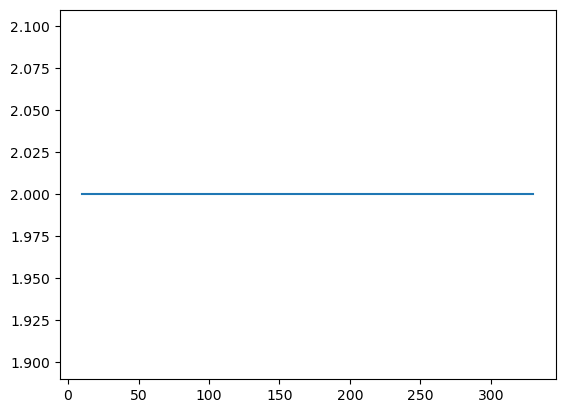

In [21]:
NumCount = 5
Dat = np.array([(np.argmin(np.array(linearDataSet(2, 15, 1, (80*x+10), R=0.15, Samples=100))[:, 1]) + 2) for x in range(NumCount)])

import matplotlib.pyplot as plt
plt.plot([(80*x+10) for x in range(NumCount)], Dat)

In [22]:
#Practice doest quite seem to fit theory. Will have to make a better model.
#Making the same model in cpp for better cpu control and see whats really going wrong here

In [ ]:
#This experiment was again done in C++ and then python was used for data analysis and plotting. That one is in DataAnalyzer